7/10 (Sun)

---

# Depth 画像の読み込みテスト

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def depth_read(filename):
    # loads depth map D from png file
    # and returns it as a numpy array,
    # for details see readme.txt

    depth_png = np.array(Image.open(filename), dtype=int)
    # make sure we have a proper 16bit depth map here.. not 8bit!
    assert(np.max(depth_png) > 255)

    depth = depth_png.astype(np.float64) / 256.
    depth[depth_png == 0] = -1.
    return depth

In [3]:
image_path = "/home/matsuura/Development/waseda/m1/lecture_spring_2022/cgo/group_work/dataset/depth_selection/val_selection_cropped/image/2011_09_26_drive_0002_sync_image_0000000005_image_02.png"
depth_path = "/home/matsuura/Development/waseda/m1/lecture_spring_2022/cgo/group_work/dataset/depth_selection/val_selection_cropped/groundtruth_depth/2011_09_26_drive_0002_sync_groundtruth_depth_0000000005_image_02.png"

In [4]:
image = np.array(Image.open(image_path))
image = image.astype(np.float64) / 256
depth = depth_read(depth_path)

In [5]:
image.shape

(352, 1216, 3)

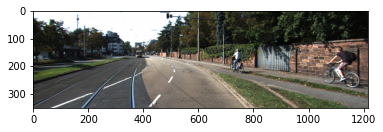

In [6]:
plt.imshow(image)

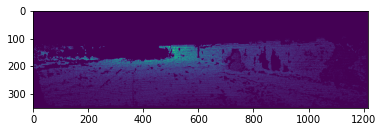

In [7]:
plt.imshow(depth)

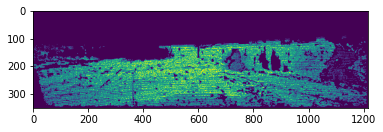

In [15]:
mask = depth.copy()
mask[mask >= 0] = 1
mask[mask == -1] = 0
plt.imshow(mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


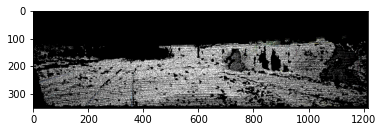

In [26]:
tmp = image.copy()
tmp[:,:,0] *= depth
tmp[:,:,1] *= depth
tmp[:,:,2] *= depth

plt.imshow(tmp)

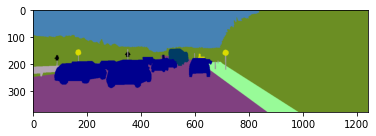

In [31]:
img = np.array(Image.open("/home/matsuura/Development/waseda/m1/lecture_spring_2022/cgo/group_work/dataset/data_semantics/training/semantic_rgb/000199_10.png"))
plt.imshow(img)